In [1]:
import keras                                       # deep learning package
from keras.datasets import mnist                   # dataset we will use to train our model
from keras.layers import Dense                     # Dense describes how the layers are connected
from keras.models import Sequential                # Sequential means we are creating a sequence of connectec layers
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout   #CNN layers, "Dropout" help avoid overfitting by dropping some of the parameters/pixels you don't have to process 
from keras.optimizers import SGD                   # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt                    # visualize images
from keras.preprocessing import image              # preprocess images
import tensorflow as tf                            # another way to obtain the data if keras link is not working

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

16384/29515 [===============>..............] - ETA: 0s

32768/29515 [=================================] - 0s 3us/step


    8192/26421880 [..............................] - ETA: 0s

   16384/26421880 [..............................] - ETA: 2:39

   49152/26421880 [..............................] - ETA: 1:46

  106496/26421880 [..............................] - ETA: 1:13

  221184/26421880 [..............................] - ETA: 47s 

  417792/26421880 [..............................] - ETA: 30s

  819200/26421880 [..............................] - ETA: 18s

 1630208/26421880 [>.............................] - ETA: 10s

 3170304/26421880 [==>...........................] - ETA: 5s 

 3309568/26421880 [==>...........................] - ETA: 5s

 6356992/26421880 [======>.......................] - ETA: 2s

 9428992/26421880 [=========>....................] - ETA: 1s

 9576448/26421880 [=========>....................] - ETA: 1s

12591104/26421880 [=============>................] - ETA: 1s

12730368/26421880 [=============>................] - ETA: 1s

15736832/26421880 [================>.............] - ETA: 0s

18800640/26421880 [====================>.........] - ETA: 0s

18948096/26421880 [====================>.........] - ETA: 0s

21979136/26421880 [=======================>......] - ETA: 0s

22102016/26421880 [========================>.....] - ETA: 0s

22110208/26421880 [========================>.....] - ETA: 0s

25247744/26421880 [===========================>..] - ETA: 0s

26427392/26421880 [==============================] - 2s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

  16384/4422102 [..............................] - ETA: 26s

  49152/4422102 [..............................] - ETA: 17s

 106496/4422102 [..............................] - ETA: 12s

 221184/4422102 [>.............................] - ETA: 7s 

 425984/4422102 [=>............................] - ETA: 4s

 868352/4422102 [====>.........................] - ETA: 2s

1744896/4422102 [==========>...................] - ETA: 1s

3497984/4422102 [======================>.......] - ETA: 0s

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
trainX = trainX.reshape(60000,28,28,1)
testX = testX.reshape(10000,28,28,1)
trainY = keras.utils.to_categorical(trainY,10)
testY = keras.utils.to_categorical(testY,10)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [6]:
trainX[1].shape

(28, 28, 1)

In [7]:
trainY[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [10]:
model.compile(optimizer=keras.optimizers.Adadelta(),loss="categorical_crossentropy",metrics=["accuracy"])

In [12]:
history=model.fit(trainX,trainY,validation_data=(testX, testY),epochs=2, batch_size=128,verbose=1)

Instructions for updating:
Use tf.cast instead.


Train on 60000 samples, validate on 10000 samples
Epoch 1/2


  128/60000 [..............................] - ETA: 12:00 - loss: 14.2163 - acc: 0.0547

  256/60000 [..............................] - ETA: 9:53 - loss: 14.2564 - acc: 0.0820 

  384/60000 [..............................] - ETA: 8:56 - loss: 14.1215 - acc: 0.1016

  512/60000 [..............................] - ETA: 8:36 - loss: 14.0752 - acc: 0.1094

  640/60000 [..............................] - ETA: 8:23 - loss: 13.8965 - acc: 0.1203

  768/60000 [..............................] - ETA: 8:08 - loss: 13.9617 - acc: 0.1185

  896/60000 [..............................] - ETA: 8:04 - loss: 14.0359 - acc: 0.1161

 1024/60000 [..............................] - ETA: 7:55 - loss: 14.0534 - acc: 0.1162

 1152/60000 [..............................] - ETA: 7:51 - loss: 14.0169 - acc: 0.1198

 1280/60000 [..............................] - ETA: 7:45 - loss: 13.9500 - acc: 0.1250

 1408/60000 [..............................] - ETA: 7:39 - loss: 13.9182 - acc: 0.1278

 1536/60000 [..............................] - ETA: 7:35 - loss: 13.8175 - acc: 0.1348

 1664/60000 [..............................] - ETA: 7:33 - loss: 13.7928 - acc: 0.1352

 1792/60000 [..............................] - ETA: 7:32 - loss: 13.7538 - acc: 0.1367

 1920/60000 [..............................] - ETA: 7:29 - loss: 13.7479 - acc: 0.1375

 2048/60000 [>.............................] - ETA: 7:27 - loss: 13.6880 - acc: 0.1416

 2176/60000 [>.............................] - ETA: 7:25 - loss: 13.6013 - acc: 0.1475

 2304/60000 [>.............................] - ETA: 7:23 - loss: 13.5732 - acc: 0.1497

 2432/60000 [>.............................] - ETA: 7:23 - loss: 13.5945 - acc: 0.1488

 2560/60000 [>.............................] - ETA: 7:20 - loss: 13.5942 - acc: 0.1492

 2688/60000 [>.............................] - ETA: 7:18 - loss: 13.5217 - acc: 0.1536

 2816/60000 [>.............................] - ETA: 7:17 - loss: 13.4895 - acc: 0.1559

 2944/60000 [>.............................] - ETA: 7:18 - loss: 13.4341 - acc: 0.1596

 3072/60000 [>.............................] - ETA: 7:16 - loss: 13.4189 - acc: 0.1602

 3200/60000 [>.............................] - ETA: 7:15 - loss: 13.4053 - acc: 0.1613

 3328/60000 [>.............................] - ETA: 7:14 - loss: 13.3518 - acc: 0.1644

 3456/60000 [>.............................] - ETA: 7:14 - loss: 13.3373 - acc: 0.1652

 3584/60000 [>.............................] - ETA: 7:13 - loss: 13.2944 - acc: 0.1680

 3712/60000 [>.............................] - ETA: 7:11 - loss: 13.2472 - acc: 0.1711

 3840/60000 [>.............................] - ETA: 7:10 - loss: 13.2311 - acc: 0.1716

 3968/60000 [>.............................] - ETA: 7:09 - loss: 13.1821 - acc: 0.1746

 4096/60000 [=>............................] - ETA: 7:07 - loss: 13.1535 - acc: 0.1763

 4224/60000 [=>............................] - ETA: 7:05 - loss: 13.1327 - acc: 0.1778

 4352/60000 [=>............................] - ETA: 7:05 - loss: 13.1253 - acc: 0.1783

 4480/60000 [=>............................] - ETA: 7:03 - loss: 13.0924 - acc: 0.1797

 4608/60000 [=>............................] - ETA: 7:02 - loss: 13.0636 - acc: 0.1816

 4736/60000 [=>............................] - ETA: 7:00 - loss: 13.0546 - acc: 0.1822

 4864/60000 [=>............................] - ETA: 6:59 - loss: 13.0214 - acc: 0.1842

 4992/60000 [=>............................] - ETA: 6:59 - loss: 13.0080 - acc: 0.1849

 5120/60000 [=>............................] - ETA: 6:57 - loss: 12.9990 - acc: 0.1854

 5248/60000 [=>............................] - ETA: 6:57 - loss: 12.9305 - acc: 0.1896

 5376/60000 [=>............................] - ETA: 6:56 - loss: 12.8941 - acc: 0.1918

 5504/60000 [=>............................] - ETA: 6:55 - loss: 12.8578 - acc: 0.1942

 5632/60000 [=>............................] - ETA: 6:53 - loss: 12.8002 - acc: 0.1980

 5760/60000 [=>............................] - ETA: 6:52 - loss: 12.7900 - acc: 0.1988

 5888/60000 [=>............................] - ETA: 6:51 - loss: 12.7662 - acc: 0.1997

 6016/60000 [==>...........................] - ETA: 6:50 - loss: 12.7151 - acc: 0.2026

 6144/60000 [==>...........................] - ETA: 6:48 - loss: 12.6519 - acc: 0.2064

 6272/60000 [==>...........................] - ETA: 6:48 - loss: 12.6247 - acc: 0.2082

 6400/60000 [==>...........................] - ETA: 6:46 - loss: 12.5888 - acc: 0.2103

 6528/60000 [==>...........................] - ETA: 6:45 - loss: 12.5336 - acc: 0.2138

 6656/60000 [==>...........................] - ETA: 6:44 - loss: 12.4831 - acc: 0.2169

 6784/60000 [==>...........................] - ETA: 6:42 - loss: 12.4558 - acc: 0.2186

 6912/60000 [==>...........................] - ETA: 6:42 - loss: 12.4145 - acc: 0.2211

 7040/60000 [==>...........................] - ETA: 6:40 - loss: 12.3602 - acc: 0.2246

 7168/60000 [==>...........................] - ETA: 6:39 - loss: 12.3035 - acc: 0.2280

 7296/60000 [==>...........................] - ETA: 6:37 - loss: 12.2641 - acc: 0.2303

 7424/60000 [==>...........................] - ETA: 6:36 - loss: 12.2358 - acc: 0.2318

 7552/60000 [==>...........................] - ETA: 6:36 - loss: 12.1890 - acc: 0.2344

 7680/60000 [==>...........................] - ETA: 6:34 - loss: 12.1364 - acc: 0.2370

 7808/60000 [==>...........................] - ETA: 6:33 - loss: 12.0879 - acc: 0.2396

 7936/60000 [==>...........................] - ETA: 6:32 - loss: 12.0341 - acc: 0.2423

 8064/60000 [===>..........................] - ETA: 6:31 - loss: 11.9869 - acc: 0.2447

36736/60000 [=================>............] - ETA: 2:50 - loss: 3.4566 - acc: 0.6560

36864/60000 [=================>............] - ETA: 2:49 - loss: 3.4459 - acc: 0.6567

36992/60000 [=================>............] - ETA: 2:48 - loss: 3.4358 - acc: 0.6574

37120/60000 [=================>............] - ETA: 2:47 - loss: 3.4256 - acc: 0.6579

37248/60000 [=================>............] - ETA: 2:46 - loss: 3.4160 - acc: 0.6585

37376/60000 [=================>............] - ETA: 2:45 - loss: 3.4068 - acc: 0.6589

37504/60000 [=================>............] - ETA: 2:44 - loss: 3.3967 - acc: 0.6595

37632/60000 [=================>............] - ETA: 2:43 - loss: 3.3869 - acc: 0.6600

37760/60000 [=================>............] - ETA: 2:42 - loss: 3.3767 - acc: 0.6606

37888/60000 [=================>............] - ETA: 2:42 - loss: 3.3675 - acc: 0.6610

38016/60000 [==================>...........] - ETA: 2:41 - loss: 3.3576 - acc: 0.6616

38144/60000 [==================>...........] - ETA: 2:40 - loss: 3.3480 - acc: 0.6621

38272/60000 [==================>...........] - ETA: 2:39 - loss: 3.3386 - acc: 0.6627

38400/60000 [==================>...........] - ETA: 2:38 - loss: 3.3293 - acc: 0.6632

38528/60000 [==================>...........] - ETA: 2:37 - loss: 3.3200 - acc: 0.6637

38656/60000 [==================>...........] - ETA: 2:36 - loss: 3.3105 - acc: 0.6643

38784/60000 [==================>...........] - ETA: 2:35 - loss: 3.3007 - acc: 0.6650

38912/60000 [==================>...........] - ETA: 2:34 - loss: 3.2917 - acc: 0.6655

39040/60000 [==================>...........] - ETA: 2:33 - loss: 3.2824 - acc: 0.6660

39168/60000 [==================>...........] - ETA: 2:32 - loss: 3.2733 - acc: 0.6664

39296/60000 [==================>...........] - ETA: 2:31 - loss: 3.2648 - acc: 0.6670

39424/60000 [==================>...........] - ETA: 2:30 - loss: 3.2556 - acc: 0.6675

39552/60000 [==================>...........] - ETA: 2:29 - loss: 3.2469 - acc: 0.6679

39680/60000 [==================>...........] - ETA: 2:28 - loss: 3.2381 - acc: 0.6684

39808/60000 [==================>...........] - ETA: 2:28 - loss: 3.2295 - acc: 0.6688

39936/60000 [==================>...........] - ETA: 2:27 - loss: 3.2203 - acc: 0.6694

40064/60000 [===================>..........] - ETA: 2:26 - loss: 3.2112 - acc: 0.6702

40192/60000 [===================>..........] - ETA: 2:25 - loss: 3.2026 - acc: 0.6706

40320/60000 [===================>..........] - ETA: 2:24 - loss: 3.1939 - acc: 0.6711

40448/60000 [===================>..........] - ETA: 2:23 - loss: 3.1858 - acc: 0.6715

40576/60000 [===================>..........] - ETA: 2:22 - loss: 3.1773 - acc: 0.6720

40704/60000 [===================>..........] - ETA: 2:21 - loss: 3.1688 - acc: 0.6725

40832/60000 [===================>..........] - ETA: 2:20 - loss: 3.1607 - acc: 0.6730

40960/60000 [===================>..........] - ETA: 2:19 - loss: 3.1523 - acc: 0.6735

41088/60000 [===================>..........] - ETA: 2:18 - loss: 3.1440 - acc: 0.6740

41216/60000 [===================>..........] - ETA: 2:17 - loss: 3.1361 - acc: 0.6745

41344/60000 [===================>..........] - ETA: 2:16 - loss: 3.1282 - acc: 0.6749

41472/60000 [===================>..........] - ETA: 2:15 - loss: 3.1204 - acc: 0.6753

41600/60000 [===================>..........] - ETA: 2:15 - loss: 3.1120 - acc: 0.6758

41728/60000 [===================>..........] - ETA: 2:14 - loss: 3.1049 - acc: 0.6761

41856/60000 [===================>..........] - ETA: 2:13 - loss: 3.0972 - acc: 0.6765

41984/60000 [===================>..........] - ETA: 2:12 - loss: 3.0891 - acc: 0.6772

42112/60000 [====================>.........] - ETA: 2:11 - loss: 3.0812 - acc: 0.6776

42240/60000 [====================>.........] - ETA: 2:10 - loss: 3.0736 - acc: 0.6780

42368/60000 [====================>.........] - ETA: 2:09 - loss: 3.0658 - acc: 0.6783

42496/60000 [====================>.........] - ETA: 2:08 - loss: 3.0578 - acc: 0.6789

42624/60000 [====================>.........] - ETA: 2:07 - loss: 3.0500 - acc: 0.6793

42752/60000 [====================>.........] - ETA: 2:06 - loss: 3.0422 - acc: 0.6797

42880/60000 [====================>.........] - ETA: 2:05 - loss: 3.0347 - acc: 0.6802

43008/60000 [====================>.........] - ETA: 2:04 - loss: 3.0266 - acc: 0.6808

43136/60000 [====================>.........] - ETA: 2:03 - loss: 3.0190 - acc: 0.6812

43264/60000 [====================>.........] - ETA: 2:02 - loss: 3.0114 - acc: 0.6818

43392/60000 [====================>.........] - ETA: 2:01 - loss: 3.0037 - acc: 0.6823

43520/60000 [====================>.........] - ETA: 2:00 - loss: 2.9964 - acc: 0.6827

43648/60000 [====================>.........] - ETA: 2:00 - loss: 2.9893 - acc: 0.6829

43776/60000 [====================>.........] - ETA: 1:59 - loss: 2.9818 - acc: 0.6835

43904/60000 [====================>.........] - ETA: 1:58 - loss: 2.9744 - acc: 0.6839

44032/60000 [=====================>........] - ETA: 1:57 - loss: 2.9673 - acc: 0.6843

44160/60000 [=====================>........] - ETA: 1:56 - loss: 2.9606 - acc: 0.6847

44288/60000 [=====================>........] - ETA: 1:55 - loss: 2.9535 - acc: 0.6852

44416/60000 [=====================>........] - ETA: 1:54 - loss: 2.9463 - acc: 0.6857

44544/60000 [=====================>........] - ETA: 1:53 - loss: 2.9390 - acc: 0.6862

44672/60000 [=====================>........] - ETA: 1:52 - loss: 2.9319 - acc: 0.6866

44800/60000 [=====================>........] - ETA: 1:51 - loss: 2.9255 - acc: 0.6869

44928/60000 [=====================>........] - ETA: 1:50 - loss: 2.9183 - acc: 0.6873

45056/60000 [=====================>........] - ETA: 1:49 - loss: 2.9113 - acc: 0.6878

45184/60000 [=====================>........] - ETA: 1:48 - loss: 2.9043 - acc: 0.6883

45312/60000 [=====================>........] - ETA: 1:48 - loss: 2.8974 - acc: 0.6886

45440/60000 [=====================>........] - ETA: 1:47 - loss: 2.8906 - acc: 0.6888

45568/60000 [=====================>........] - ETA: 1:46 - loss: 2.8839 - acc: 0.6892

45696/60000 [=====================>........] - ETA: 1:45 - loss: 2.8769 - acc: 0.6897

45824/60000 [=====================>........] - ETA: 1:44 - loss: 2.8701 - acc: 0.6901

45952/60000 [=====================>........] - ETA: 1:43 - loss: 2.8632 - acc: 0.6905

46080/60000 [======================>.......] - ETA: 1:42 - loss: 2.8567 - acc: 0.6910

46208/60000 [======================>.......] - ETA: 1:41 - loss: 2.8500 - acc: 0.6913

46336/60000 [======================>.......] - ETA: 1:40 - loss: 2.8436 - acc: 0.6917

46464/60000 [======================>.......] - ETA: 1:39 - loss: 2.8377 - acc: 0.6919

46592/60000 [======================>.......] - ETA: 1:38 - loss: 2.8311 - acc: 0.6924

46720/60000 [======================>.......] - ETA: 1:37 - loss: 2.8243 - acc: 0.6929

46848/60000 [======================>.......] - ETA: 1:36 - loss: 2.8175 - acc: 0.6933

46976/60000 [======================>.......] - ETA: 1:35 - loss: 2.8109 - acc: 0.6938

47104/60000 [======================>.......] - ETA: 1:35 - loss: 2.8043 - acc: 0.6943

47232/60000 [======================>.......] - ETA: 1:34 - loss: 2.7982 - acc: 0.6947

47360/60000 [======================>.......] - ETA: 1:33 - loss: 2.7918 - acc: 0.6951

47488/60000 [======================>.......] - ETA: 1:32 - loss: 2.7853 - acc: 0.6956

47616/60000 [======================>.......] - ETA: 1:31 - loss: 2.7789 - acc: 0.6961

47744/60000 [======================>.......] - ETA: 1:30 - loss: 2.7725 - acc: 0.6966

47872/60000 [======================>.......] - ETA: 1:29 - loss: 2.7660 - acc: 0.6971

48000/60000 [=======================>......] - ETA: 1:28 - loss: 2.7607 - acc: 0.6973

48128/60000 [=======================>......] - ETA: 1:27 - loss: 2.7547 - acc: 0.6977

48256/60000 [=======================>......] - ETA: 1:26 - loss: 2.7485 - acc: 0.6981

48384/60000 [=======================>......] - ETA: 1:25 - loss: 2.7425 - acc: 0.6984

48512/60000 [=======================>......] - ETA: 1:24 - loss: 2.7361 - acc: 0.6989

48640/60000 [=======================>......] - ETA: 1:23 - loss: 2.7300 - acc: 0.6993

48768/60000 [=======================>......] - ETA: 1:22 - loss: 2.7240 - acc: 0.6997

48896/60000 [=======================>......] - ETA: 1:21 - loss: 2.7181 - acc: 0.7001

49024/60000 [=======================>......] - ETA: 1:20 - loss: 2.7123 - acc: 0.7002

49152/60000 [=======================>......] - ETA: 1:20 - loss: 2.7065 - acc: 0.7007

49280/60000 [=======================>......] - ETA: 1:19 - loss: 2.7006 - acc: 0.7010

49408/60000 [=======================>......] - ETA: 1:18 - loss: 2.6947 - acc: 0.7013

49536/60000 [=======================>......] - ETA: 1:17 - loss: 2.6898 - acc: 0.7015

49664/60000 [=======================>......] - ETA: 1:16 - loss: 2.6841 - acc: 0.7019

49792/60000 [=======================>......] - ETA: 1:15 - loss: 2.6783 - acc: 0.7023

49920/60000 [=======================>......] - ETA: 1:14 - loss: 2.6725 - acc: 0.7026

50048/60000 [========================>.....] - ETA: 1:13 - loss: 2.6672 - acc: 0.7030

50176/60000 [========================>.....] - ETA: 1:12 - loss: 2.6614 - acc: 0.7034

50304/60000 [========================>.....] - ETA: 1:11 - loss: 2.6556 - acc: 0.7038

50432/60000 [========================>.....] - ETA: 1:10 - loss: 2.6495 - acc: 0.7043

50560/60000 [========================>.....] - ETA: 1:09 - loss: 2.6442 - acc: 0.7046

50688/60000 [========================>.....] - ETA: 1:08 - loss: 2.6388 - acc: 0.7049

50816/60000 [========================>.....] - ETA: 1:07 - loss: 2.6335 - acc: 0.7052

50944/60000 [========================>.....] - ETA: 1:06 - loss: 2.6288 - acc: 0.7054

51072/60000 [========================>.....] - ETA: 1:05 - loss: 2.6233 - acc: 0.7057

51200/60000 [========================>.....] - ETA: 1:04 - loss: 2.6179 - acc: 0.7060

51328/60000 [========================>.....] - ETA: 1:04 - loss: 2.6123 - acc: 0.7064

51456/60000 [========================>.....] - ETA: 1:03 - loss: 2.6067 - acc: 0.7067

51584/60000 [========================>.....] - ETA: 1:02 - loss: 2.6017 - acc: 0.7071

51712/60000 [========================>.....] - ETA: 1:01 - loss: 2.5963 - acc: 0.7076

51840/60000 [========================>.....] - ETA: 1:00 - loss: 2.5910 - acc: 0.7078

51968/60000 [========================>.....] - ETA: 59s - loss: 2.5860 - acc: 0.7081 

52096/60000 [=========================>....] - ETA: 58s - loss: 2.5806 - acc: 0.7084

52224/60000 [=========================>....] - ETA: 57s - loss: 2.5758 - acc: 0.7088

52352/60000 [=========================>....] - ETA: 56s - loss: 2.5706 - acc: 0.7091

52480/60000 [=========================>....] - ETA: 55s - loss: 2.5654 - acc: 0.7094

52608/60000 [=========================>....] - ETA: 54s - loss: 2.5604 - acc: 0.7097

52736/60000 [=========================>....] - ETA: 53s - loss: 2.5552 - acc: 0.7101

52864/60000 [=========================>....] - ETA: 52s - loss: 2.5504 - acc: 0.7103

52992/60000 [=========================>....] - ETA: 51s - loss: 2.5454 - acc: 0.7105

53120/60000 [=========================>....] - ETA: 50s - loss: 2.5401 - acc: 0.7109

53248/60000 [=========================>....] - ETA: 49s - loss: 2.5351 - acc: 0.7112

53376/60000 [=========================>....] - ETA: 48s - loss: 2.5300 - acc: 0.7115

53504/60000 [=========================>....] - ETA: 48s - loss: 2.5249 - acc: 0.7119

53632/60000 [=========================>....] - ETA: 47s - loss: 2.5200 - acc: 0.7121

53760/60000 [=========================>....] - ETA: 46s - loss: 2.5149 - acc: 0.7124

53888/60000 [=========================>....] - ETA: 45s - loss: 2.5098 - acc: 0.7127

54016/60000 [==========================>...] - ETA: 44s - loss: 2.5049 - acc: 0.7130

54144/60000 [==========================>...] - ETA: 43s - loss: 2.5001 - acc: 0.7132

54272/60000 [==========================>...] - ETA: 42s - loss: 2.4954 - acc: 0.7134

54400/60000 [==========================>...] - ETA: 41s - loss: 2.4908 - acc: 0.7137

54528/60000 [==========================>...] - ETA: 40s - loss: 2.4863 - acc: 0.7139

54656/60000 [==========================>...] - ETA: 39s - loss: 2.4814 - acc: 0.7143

54784/60000 [==========================>...] - ETA: 38s - loss: 2.4765 - acc: 0.7147

54912/60000 [==========================>...] - ETA: 37s - loss: 2.4715 - acc: 0.7150

55040/60000 [==========================>...] - ETA: 36s - loss: 2.4668 - acc: 0.7153

55168/60000 [==========================>...] - ETA: 35s - loss: 2.4622 - acc: 0.7155

55296/60000 [==========================>...] - ETA: 34s - loss: 2.4576 - acc: 0.7158

55424/60000 [==========================>...] - ETA: 33s - loss: 2.4529 - acc: 0.7161

55552/60000 [==========================>...] - ETA: 32s - loss: 2.4480 - acc: 0.7164

55680/60000 [==========================>...] - ETA: 31s - loss: 2.4432 - acc: 0.7167

55808/60000 [==========================>...] - ETA: 30s - loss: 2.4382 - acc: 0.7171

55936/60000 [==========================>...] - ETA: 30s - loss: 2.4334 - acc: 0.7175

56064/60000 [===========================>..] - ETA: 29s - loss: 2.4291 - acc: 0.7178

56192/60000 [===========================>..] - ETA: 28s - loss: 2.4245 - acc: 0.7182

56320/60000 [===========================>..] - ETA: 27s - loss: 2.4199 - acc: 0.7185

56448/60000 [===========================>..] - ETA: 26s - loss: 2.4152 - acc: 0.7190

56576/60000 [===========================>..] - ETA: 25s - loss: 2.4108 - acc: 0.7194

56704/60000 [===========================>..] - ETA: 24s - loss: 2.4060 - acc: 0.7197

56832/60000 [===========================>..] - ETA: 23s - loss: 2.4015 - acc: 0.7200

56960/60000 [===========================>..] - ETA: 22s - loss: 2.3976 - acc: 0.7201

57088/60000 [===========================>..] - ETA: 21s - loss: 2.3935 - acc: 0.7203

57216/60000 [===========================>..] - ETA: 20s - loss: 2.3889 - acc: 0.7207

57344/60000 [===========================>..] - ETA: 19s - loss: 2.3844 - acc: 0.7210

57472/60000 [===========================>..] - ETA: 18s - loss: 2.3799 - acc: 0.7213

57600/60000 [===========================>..] - ETA: 17s - loss: 2.3756 - acc: 0.7216

57728/60000 [===========================>..] - ETA: 16s - loss: 2.3712 - acc: 0.7219

57856/60000 [===========================>..] - ETA: 15s - loss: 2.3669 - acc: 0.7222

57984/60000 [===========================>..] - ETA: 14s - loss: 2.3624 - acc: 0.7226

58112/60000 [============================>.] - ETA: 13s - loss: 2.3585 - acc: 0.7228

58240/60000 [============================>.] - ETA: 13s - loss: 2.3546 - acc: 0.7230

58368/60000 [============================>.] - ETA: 12s - loss: 2.3503 - acc: 0.7232

58496/60000 [============================>.] - ETA: 11s - loss: 2.3460 - acc: 0.7235

58624/60000 [============================>.] - ETA: 10s - loss: 2.3416 - acc: 0.7238

58752/60000 [============================>.] - ETA: 9s - loss: 2.3378 - acc: 0.7239 

58880/60000 [============================>.] - ETA: 8s - loss: 2.3336 - acc: 0.7241

59008/60000 [============================>.] - ETA: 7s - loss: 2.3294 - acc: 0.7245

59136/60000 [============================>.] - ETA: 6s - loss: 2.3252 - acc: 0.7247

59264/60000 [============================>.] - ETA: 5s - loss: 2.3210 - acc: 0.7250

59392/60000 [============================>.] - ETA: 4s - loss: 2.3166 - acc: 0.7254

59520/60000 [============================>.] - ETA: 3s - loss: 2.3127 - acc: 0.7258

59648/60000 [============================>.] - ETA: 2s - loss: 2.3089 - acc: 0.7260

59776/60000 [============================>.] - ETA: 1s - loss: 2.3051 - acc: 0.7263

59904/60000 [============================>.] - ETA: 0s - loss: 2.3012 - acc: 0.7266

60000/60000 [==============================] - 466s 8ms/step - loss: 2.2982 - acc: 0.7268 - val_loss: 0.3592 - val_acc: 0.8723


Epoch 2/2


  128/60000 [..............................] - ETA: 6:56 - loss: 0.3828 - acc: 0.8594

  256/60000 [..............................] - ETA: 7:16 - loss: 0.3941 - acc: 0.8516

  384/60000 [..............................] - ETA: 7:17 - loss: 0.4091 - acc: 0.8620

  512/60000 [..............................] - ETA: 7:20 - loss: 0.4182 - acc: 0.8613

  640/60000 [..............................] - ETA: 7:24 - loss: 0.4075 - acc: 0.8609

  768/60000 [..............................] - ETA: 7:21 - loss: 0.3961 - acc: 0.8607

  896/60000 [..............................] - ETA: 7:23 - loss: 0.3908 - acc: 0.8583

 1024/60000 [..............................] - ETA: 7:25 - loss: 0.4006 - acc: 0.8555

 1152/60000 [..............................] - ETA: 7:24 - loss: 0.4005 - acc: 0.8594

 1280/60000 [..............................] - ETA: 7:25 - loss: 0.4078 - acc: 0.8539

 1408/60000 [..............................] - ETA: 7:29 - loss: 0.4048 - acc: 0.8544

 1536/60000 [..............................] - ETA: 7:28 - loss: 0.4080 - acc: 0.8535

 1664/60000 [..............................] - ETA: 7:25 - loss: 0.4196 - acc: 0.8516

 1792/60000 [..............................] - ETA: 7:24 - loss: 0.4258 - acc: 0.8527

 1920/60000 [..............................] - ETA: 7:25 - loss: 0.4160 - acc: 0.8562

 2048/60000 [>.............................] - ETA: 7:24 - loss: 0.4184 - acc: 0.8540

 2176/60000 [>.............................] - ETA: 7:23 - loss: 0.4150 - acc: 0.8539

 2304/60000 [>.............................] - ETA: 7:23 - loss: 0.4166 - acc: 0.8520

 2432/60000 [>.............................] - ETA: 7:22 - loss: 0.4130 - acc: 0.8536

 2560/60000 [>.............................] - ETA: 7:20 - loss: 0.4119 - acc: 0.8555

 2688/60000 [>.............................] - ETA: 7:19 - loss: 0.4111 - acc: 0.8579

 2816/60000 [>.............................] - ETA: 7:18 - loss: 0.4166 - acc: 0.8569

 2944/60000 [>.............................] - ETA: 7:17 - loss: 0.4192 - acc: 0.8577

 3072/60000 [>.............................] - ETA: 7:16 - loss: 0.4211 - acc: 0.8564

 3200/60000 [>.............................] - ETA: 7:16 - loss: 0.4188 - acc: 0.8578

 3328/60000 [>.............................] - ETA: 7:15 - loss: 0.4172 - acc: 0.8576

 3456/60000 [>.............................] - ETA: 7:13 - loss: 0.4122 - acc: 0.8588

 3584/60000 [>.............................] - ETA: 7:13 - loss: 0.4114 - acc: 0.8585

 3712/60000 [>.............................] - ETA: 7:12 - loss: 0.4113 - acc: 0.8580

 3840/60000 [>.............................] - ETA: 7:11 - loss: 0.4077 - acc: 0.8594

 3968/60000 [>.............................] - ETA: 7:10 - loss: 0.4037 - acc: 0.8601

 4096/60000 [=>............................] - ETA: 7:10 - loss: 0.4062 - acc: 0.8594

 4224/60000 [=>............................] - ETA: 7:08 - loss: 0.4002 - acc: 0.8613

 4352/60000 [=>............................] - ETA: 7:07 - loss: 0.4011 - acc: 0.8605

 4480/60000 [=>............................] - ETA: 7:06 - loss: 0.3992 - acc: 0.8614

 4608/60000 [=>............................] - ETA: 7:05 - loss: 0.3989 - acc: 0.8611

 4736/60000 [=>............................] - ETA: 7:04 - loss: 0.3987 - acc: 0.8611

 4864/60000 [=>............................] - ETA: 7:03 - loss: 0.3966 - acc: 0.8625

 4992/60000 [=>............................] - ETA: 7:03 - loss: 0.3948 - acc: 0.8628

 5120/60000 [=>............................] - ETA: 7:03 - loss: 0.3951 - acc: 0.8627

 5248/60000 [=>............................] - ETA: 7:03 - loss: 0.3970 - acc: 0.8613

 5376/60000 [=>............................] - ETA: 7:03 - loss: 0.3972 - acc: 0.8610

 5504/60000 [=>............................] - ETA: 7:02 - loss: 0.3999 - acc: 0.8599

 5632/60000 [=>............................] - ETA: 7:02 - loss: 0.4005 - acc: 0.8599

 5760/60000 [=>............................] - ETA: 7:01 - loss: 0.4022 - acc: 0.8592

 5888/60000 [=>............................] - ETA: 7:00 - loss: 0.4026 - acc: 0.8589

 6016/60000 [==>...........................] - ETA: 6:59 - loss: 0.4024 - acc: 0.8595

 6144/60000 [==>...........................] - ETA: 6:58 - loss: 0.4029 - acc: 0.8594

 6272/60000 [==>...........................] - ETA: 6:57 - loss: 0.4044 - acc: 0.8591

 6400/60000 [==>...........................] - ETA: 6:56 - loss: 0.4055 - acc: 0.8588

 6528/60000 [==>...........................] - ETA: 6:54 - loss: 0.4049 - acc: 0.8591

 6656/60000 [==>...........................] - ETA: 6:53 - loss: 0.4047 - acc: 0.8591

 6784/60000 [==>...........................] - ETA: 6:52 - loss: 0.4043 - acc: 0.8591

 6912/60000 [==>...........................] - ETA: 6:51 - loss: 0.4032 - acc: 0.8591

 7040/60000 [==>...........................] - ETA: 6:50 - loss: 0.4017 - acc: 0.8597

 7168/60000 [==>...........................] - ETA: 6:49 - loss: 0.3987 - acc: 0.8599

 7296/60000 [==>...........................] - ETA: 6:48 - loss: 0.3993 - acc: 0.8603

 7424/60000 [==>...........................] - ETA: 6:47 - loss: 0.4000 - acc: 0.8595

 7552/60000 [==>...........................] - ETA: 6:46 - loss: 0.3995 - acc: 0.8596

 7680/60000 [==>...........................] - ETA: 6:45 - loss: 0.4004 - acc: 0.8592

 7808/60000 [==>...........................] - ETA: 6:44 - loss: 0.3988 - acc: 0.8594

 7936/60000 [==>...........................] - ETA: 6:43 - loss: 0.3983 - acc: 0.8595

 8064/60000 [===>..........................] - ETA: 6:42 - loss: 0.3980 - acc: 0.8596

 8192/60000 [===>..........................] - ETA: 6:41 - loss: 0.3972 - acc: 0.8596

 8320/60000 [===>..........................] - ETA: 6:40 - loss: 0.3978 - acc: 0.8593

 8448/60000 [===>..........................] - ETA: 6:39 - loss: 0.3982 - acc: 0.8591

 8576/60000 [===>..........................] - ETA: 6:38 - loss: 0.3968 - acc: 0.8595

 8704/60000 [===>..........................] - ETA: 6:37 - loss: 0.3991 - acc: 0.8583

 8832/60000 [===>..........................] - ETA: 6:36 - loss: 0.3981 - acc: 0.8586

 8960/60000 [===>..........................] - ETA: 6:35 - loss: 0.3963 - acc: 0.8589

 9088/60000 [===>..........................] - ETA: 6:34 - loss: 0.3964 - acc: 0.8592

 9216/60000 [===>..........................] - ETA: 6:34 - loss: 0.3959 - acc: 0.8590

 9344/60000 [===>..........................] - ETA: 6:33 - loss: 0.3970 - acc: 0.8585

 9472/60000 [===>..........................] - ETA: 6:32 - loss: 0.3974 - acc: 0.8582

 9600/60000 [===>..........................] - ETA: 6:31 - loss: 0.3969 - acc: 0.8580

 9728/60000 [===>..........................] - ETA: 6:31 - loss: 0.3987 - acc: 0.8574

 9856/60000 [===>..........................] - ETA: 6:30 - loss: 0.3989 - acc: 0.8573

 9984/60000 [===>..........................] - ETA: 6:29 - loss: 0.3998 - acc: 0.8571

10112/60000 [====>.........................] - ETA: 6:28 - loss: 0.3994 - acc: 0.8577

10240/60000 [====>.........................] - ETA: 6:27 - loss: 0.4001 - acc: 0.8578

10368/60000 [====>.........................] - ETA: 6:26 - loss: 0.3985 - acc: 0.8584

10496/60000 [====>.........................] - ETA: 6:24 - loss: 0.3992 - acc: 0.8584

10624/60000 [====>.........................] - ETA: 6:23 - loss: 0.4007 - acc: 0.8586

10752/60000 [====>.........................] - ETA: 6:22 - loss: 0.3993 - acc: 0.8591

10880/60000 [====>.........................] - ETA: 6:21 - loss: 0.3997 - acc: 0.8593

11008/60000 [====>.........................] - ETA: 6:21 - loss: 0.3996 - acc: 0.8592

11136/60000 [====>.........................] - ETA: 6:20 - loss: 0.3993 - acc: 0.8596

11264/60000 [====>.........................] - ETA: 6:18 - loss: 0.4001 - acc: 0.8596

11392/60000 [====>.........................] - ETA: 6:17 - loss: 0.3980 - acc: 0.8603

11520/60000 [====>.........................] - ETA: 6:16 - loss: 0.3972 - acc: 0.8602

11648/60000 [====>.........................] - ETA: 6:15 - loss: 0.3957 - acc: 0.8606

11776/60000 [====>.........................] - ETA: 6:14 - loss: 0.3956 - acc: 0.8603

11904/60000 [====>.........................] - ETA: 6:13 - loss: 0.3952 - acc: 0.8599

12032/60000 [=====>........................] - ETA: 6:12 - loss: 0.3952 - acc: 0.8597

12160/60000 [=====>........................] - ETA: 6:11 - loss: 0.3947 - acc: 0.8600

12288/60000 [=====>........................] - ETA: 6:10 - loss: 0.3943 - acc: 0.8601

12416/60000 [=====>........................] - ETA: 6:08 - loss: 0.3952 - acc: 0.8601

12544/60000 [=====>........................] - ETA: 6:07 - loss: 0.3952 - acc: 0.8599

12672/60000 [=====>........................] - ETA: 6:06 - loss: 0.3940 - acc: 0.8600

12800/60000 [=====>........................] - ETA: 6:05 - loss: 0.3924 - acc: 0.8605

12928/60000 [=====>........................] - ETA: 6:04 - loss: 0.3923 - acc: 0.8605

13056/60000 [=====>........................] - ETA: 6:03 - loss: 0.3924 - acc: 0.8604

13184/60000 [=====>........................] - ETA: 6:02 - loss: 0.3921 - acc: 0.8607

13312/60000 [=====>........................] - ETA: 6:01 - loss: 0.3927 - acc: 0.8607

13440/60000 [=====>........................] - ETA: 6:00 - loss: 0.3928 - acc: 0.8606

13568/60000 [=====>........................] - ETA: 5:59 - loss: 0.3951 - acc: 0.8600

13696/60000 [=====>........................] - ETA: 5:58 - loss: 0.3952 - acc: 0.8600

13824/60000 [=====>........................] - ETA: 5:57 - loss: 0.3939 - acc: 0.8604

13952/60000 [=====>........................] - ETA: 5:56 - loss: 0.3942 - acc: 0.8602

14080/60000 [======>.......................] - ETA: 5:55 - loss: 0.3947 - acc: 0.8600

14208/60000 [======>.......................] - ETA: 5:54 - loss: 0.3952 - acc: 0.8601

14336/60000 [======>.......................] - ETA: 5:53 - loss: 0.3965 - acc: 0.8604

14464/60000 [======>.......................] - ETA: 5:52 - loss: 0.3972 - acc: 0.8602

14592/60000 [======>.......................] - ETA: 5:51 - loss: 0.3967 - acc: 0.8603

14720/60000 [======>.......................] - ETA: 5:50 - loss: 0.3969 - acc: 0.8601

14848/60000 [======>.......................] - ETA: 5:49 - loss: 0.3969 - acc: 0.8601

14976/60000 [======>.......................] - ETA: 5:48 - loss: 0.3975 - acc: 0.8602

15104/60000 [======>.......................] - ETA: 5:47 - loss: 0.3964 - acc: 0.8606

15232/60000 [======>.......................] - ETA: 5:46 - loss: 0.3969 - acc: 0.8604

15360/60000 [======>.......................] - ETA: 5:44 - loss: 0.3971 - acc: 0.8605

15488/60000 [======>.......................] - ETA: 5:44 - loss: 0.3972 - acc: 0.8601

15616/60000 [======>.......................] - ETA: 5:42 - loss: 0.3976 - acc: 0.8598

15744/60000 [======>.......................] - ETA: 5:41 - loss: 0.3970 - acc: 0.8598

15872/60000 [======>.......................] - ETA: 5:40 - loss: 0.3970 - acc: 0.8598

16000/60000 [=======>......................] - ETA: 5:39 - loss: 0.3970 - acc: 0.8597

16128/60000 [=======>......................] - ETA: 5:38 - loss: 0.3972 - acc: 0.8599

16256/60000 [=======>......................] - ETA: 5:37 - loss: 0.3984 - acc: 0.8598

16384/60000 [=======>......................] - ETA: 5:36 - loss: 0.3979 - acc: 0.8597

16512/60000 [=======>......................] - ETA: 5:35 - loss: 0.3972 - acc: 0.8599

16640/60000 [=======>......................] - ETA: 5:34 - loss: 0.3973 - acc: 0.8599

16768/60000 [=======>......................] - ETA: 5:33 - loss: 0.3975 - acc: 0.8600

16896/60000 [=======>......................] - ETA: 5:33 - loss: 0.3970 - acc: 0.8602

17024/60000 [=======>......................] - ETA: 5:32 - loss: 0.3974 - acc: 0.8598

17152/60000 [=======>......................] - ETA: 5:31 - loss: 0.3979 - acc: 0.8597

17280/60000 [=======>......................] - ETA: 5:30 - loss: 0.3973 - acc: 0.8597

17408/60000 [=======>......................] - ETA: 5:29 - loss: 0.3977 - acc: 0.8598

17536/60000 [=======>......................] - ETA: 5:28 - loss: 0.3984 - acc: 0.8597

17664/60000 [=======>......................] - ETA: 5:27 - loss: 0.3985 - acc: 0.8595

17792/60000 [=======>......................] - ETA: 5:26 - loss: 0.3982 - acc: 0.8596

17920/60000 [=======>......................] - ETA: 5:25 - loss: 0.3981 - acc: 0.8595

18048/60000 [========>.....................] - ETA: 5:24 - loss: 0.3977 - acc: 0.8598

18176/60000 [========>.....................] - ETA: 5:23 - loss: 0.3967 - acc: 0.8601

18304/60000 [========>.....................] - ETA: 5:22 - loss: 0.3964 - acc: 0.8602

18432/60000 [========>.....................] - ETA: 5:21 - loss: 0.3966 - acc: 0.8601

18560/60000 [========>.....................] - ETA: 5:20 - loss: 0.3962 - acc: 0.8600

18688/60000 [========>.....................] - ETA: 5:19 - loss: 0.3954 - acc: 0.8603

18816/60000 [========>.....................] - ETA: 5:18 - loss: 0.3951 - acc: 0.8605

18944/60000 [========>.....................] - ETA: 5:17 - loss: 0.3957 - acc: 0.8605

19072/60000 [========>.....................] - ETA: 5:16 - loss: 0.3955 - acc: 0.8606

19200/60000 [========>.....................] - ETA: 5:15 - loss: 0.3957 - acc: 0.8606

19328/60000 [========>.....................] - ETA: 5:14 - loss: 0.3954 - acc: 0.8605

19456/60000 [========>.....................] - ETA: 5:13 - loss: 0.3952 - acc: 0.8606

19584/60000 [========>.....................] - ETA: 5:12 - loss: 0.3949 - acc: 0.8606

19712/60000 [========>.....................] - ETA: 5:11 - loss: 0.3940 - acc: 0.8607

19840/60000 [========>.....................] - ETA: 5:10 - loss: 0.3946 - acc: 0.8605

19968/60000 [========>.....................] - ETA: 5:09 - loss: 0.3940 - acc: 0.8606

20096/60000 [=========>....................] - ETA: 5:08 - loss: 0.3940 - acc: 0.8605

20224/60000 [=========>....................] - ETA: 5:07 - loss: 0.3936 - acc: 0.8606

20352/60000 [=========>....................] - ETA: 5:06 - loss: 0.3936 - acc: 0.8604

20480/60000 [=========>....................] - ETA: 5:05 - loss: 0.3934 - acc: 0.8604

20608/60000 [=========>....................] - ETA: 5:04 - loss: 0.3937 - acc: 0.8603

20736/60000 [=========>....................] - ETA: 5:03 - loss: 0.3937 - acc: 0.8606

20864/60000 [=========>....................] - ETA: 5:02 - loss: 0.3929 - acc: 0.8610

20992/60000 [=========>....................] - ETA: 5:01 - loss: 0.3926 - acc: 0.8615

21120/60000 [=========>....................] - ETA: 5:00 - loss: 0.3922 - acc: 0.8617

21248/60000 [=========>....................] - ETA: 4:59 - loss: 0.3914 - acc: 0.8618

21376/60000 [=========>....................] - ETA: 4:58 - loss: 0.3918 - acc: 0.8617

21504/60000 [=========>....................] - ETA: 4:57 - loss: 0.3911 - acc: 0.8619

21632/60000 [=========>....................] - ETA: 4:56 - loss: 0.3917 - acc: 0.8617

21760/60000 [=========>....................] - ETA: 4:55 - loss: 0.3916 - acc: 0.8619

21888/60000 [=========>....................] - ETA: 4:54 - loss: 0.3914 - acc: 0.8617

22016/60000 [==========>...................] - ETA: 4:53 - loss: 0.3917 - acc: 0.8619

22144/60000 [==========>...................] - ETA: 4:52 - loss: 0.3914 - acc: 0.8619

22272/60000 [==========>...................] - ETA: 4:51 - loss: 0.3912 - acc: 0.8620

22400/60000 [==========>...................] - ETA: 4:50 - loss: 0.3910 - acc: 0.8619

22528/60000 [==========>...................] - ETA: 4:49 - loss: 0.3923 - acc: 0.8616

22656/60000 [==========>...................] - ETA: 4:48 - loss: 0.3921 - acc: 0.8615

22784/60000 [==========>...................] - ETA: 4:47 - loss: 0.3917 - acc: 0.8614

22912/60000 [==========>...................] - ETA: 4:46 - loss: 0.3917 - acc: 0.8614

23040/60000 [==========>...................] - ETA: 4:45 - loss: 0.3916 - acc: 0.8614

23168/60000 [==========>...................] - ETA: 4:44 - loss: 0.3920 - acc: 0.8611

23296/60000 [==========>...................] - ETA: 4:43 - loss: 0.3916 - acc: 0.8612

23424/60000 [==========>...................] - ETA: 4:42 - loss: 0.3919 - acc: 0.8611

23552/60000 [==========>...................] - ETA: 4:41 - loss: 0.3919 - acc: 0.8612

23680/60000 [==========>...................] - ETA: 4:40 - loss: 0.3917 - acc: 0.8613

23808/60000 [==========>...................] - ETA: 4:40 - loss: 0.3912 - acc: 0.8614

23936/60000 [==========>...................] - ETA: 4:39 - loss: 0.3923 - acc: 0.8609

24064/60000 [===========>..................] - ETA: 4:38 - loss: 0.3917 - acc: 0.8611

24192/60000 [===========>..................] - ETA: 4:37 - loss: 0.3912 - acc: 0.8613

24320/60000 [===========>..................] - ETA: 4:36 - loss: 0.3916 - acc: 0.8611

24448/60000 [===========>..................] - ETA: 4:35 - loss: 0.3912 - acc: 0.8612

24576/60000 [===========>..................] - ETA: 4:34 - loss: 0.3912 - acc: 0.8612

24704/60000 [===========>..................] - ETA: 4:33 - loss: 0.3916 - acc: 0.8610

24832/60000 [===========>..................] - ETA: 4:33 - loss: 0.3921 - acc: 0.8611

24960/60000 [===========>..................] - ETA: 4:32 - loss: 0.3918 - acc: 0.8611

25088/60000 [===========>..................] - ETA: 4:31 - loss: 0.3912 - acc: 0.8612

25216/60000 [===========>..................] - ETA: 4:30 - loss: 0.3911 - acc: 0.8613

25344/60000 [===========>..................] - ETA: 4:29 - loss: 0.3910 - acc: 0.8614

25472/60000 [===========>..................] - ETA: 4:28 - loss: 0.3909 - acc: 0.8615

25600/60000 [===========>..................] - ETA: 4:27 - loss: 0.3901 - acc: 0.8617

25728/60000 [===========>..................] - ETA: 4:26 - loss: 0.3897 - acc: 0.8619

25856/60000 [===========>..................] - ETA: 4:25 - loss: 0.3891 - acc: 0.8622

25984/60000 [===========>..................] - ETA: 4:24 - loss: 0.3891 - acc: 0.8621

26112/60000 [============>.................] - ETA: 4:22 - loss: 0.3886 - acc: 0.8622

26240/60000 [============>.................] - ETA: 4:21 - loss: 0.3881 - acc: 0.8623

26368/60000 [============>.................] - ETA: 4:20 - loss: 0.3883 - acc: 0.8622

26496/60000 [============>.................] - ETA: 4:19 - loss: 0.3875 - acc: 0.8624

26624/60000 [============>.................] - ETA: 4:18 - loss: 0.3871 - acc: 0.8624

26752/60000 [============>.................] - ETA: 4:17 - loss: 0.3865 - acc: 0.8626

26880/60000 [============>.................] - ETA: 4:16 - loss: 0.3866 - acc: 0.8624

27008/60000 [============>.................] - ETA: 4:15 - loss: 0.3862 - acc: 0.8625

27136/60000 [============>.................] - ETA: 4:14 - loss: 0.3862 - acc: 0.8623

27264/60000 [============>.................] - ETA: 4:13 - loss: 0.3871 - acc: 0.8619

27392/60000 [============>.................] - ETA: 4:12 - loss: 0.3872 - acc: 0.8618

27520/60000 [============>.................] - ETA: 4:11 - loss: 0.3872 - acc: 0.8618

27648/60000 [============>.................] - ETA: 4:10 - loss: 0.3870 - acc: 0.8617

27776/60000 [============>.................] - ETA: 4:09 - loss: 0.3868 - acc: 0.8618

27904/60000 [============>.................] - ETA: 4:08 - loss: 0.3864 - acc: 0.8617

28032/60000 [=============>................] - ETA: 4:07 - loss: 0.3864 - acc: 0.8616

28160/60000 [=============>................] - ETA: 4:06 - loss: 0.3863 - acc: 0.8617

28288/60000 [=============>................] - ETA: 4:04 - loss: 0.3863 - acc: 0.8619

28416/60000 [=============>................] - ETA: 4:03 - loss: 0.3863 - acc: 0.8620

28544/60000 [=============>................] - ETA: 4:02 - loss: 0.3864 - acc: 0.8620

28672/60000 [=============>................] - ETA: 4:01 - loss: 0.3870 - acc: 0.8620

28800/60000 [=============>................] - ETA: 4:00 - loss: 0.3867 - acc: 0.8621

28928/60000 [=============>................] - ETA: 3:59 - loss: 0.3861 - acc: 0.8622

29056/60000 [=============>................] - ETA: 3:58 - loss: 0.3857 - acc: 0.8624

29184/60000 [=============>................] - ETA: 3:57 - loss: 0.3859 - acc: 0.8624

29312/60000 [=============>................] - ETA: 3:56 - loss: 0.3856 - acc: 0.8623

29440/60000 [=============>................] - ETA: 3:55 - loss: 0.3852 - acc: 0.8625

29568/60000 [=============>................] - ETA: 3:54 - loss: 0.3849 - acc: 0.8626

29696/60000 [=============>................] - ETA: 3:53 - loss: 0.3846 - acc: 0.8626

29824/60000 [=============>................] - ETA: 3:52 - loss: 0.3848 - acc: 0.8626

29952/60000 [=============>................] - ETA: 3:51 - loss: 0.3852 - acc: 0.8625

30080/60000 [==============>...............] - ETA: 3:50 - loss: 0.3852 - acc: 0.8626

30208/60000 [==============>...............] - ETA: 3:49 - loss: 0.3849 - acc: 0.8627

30336/60000 [==============>...............] - ETA: 3:48 - loss: 0.3849 - acc: 0.8626

30464/60000 [==============>...............] - ETA: 3:47 - loss: 0.3851 - acc: 0.8627

30592/60000 [==============>...............] - ETA: 3:46 - loss: 0.3846 - acc: 0.8627

30720/60000 [==============>...............] - ETA: 3:45 - loss: 0.3844 - acc: 0.8628

30848/60000 [==============>...............] - ETA: 3:44 - loss: 0.3843 - acc: 0.8627

30976/60000 [==============>...............] - ETA: 3:43 - loss: 0.3841 - acc: 0.8627

31104/60000 [==============>...............] - ETA: 3:42 - loss: 0.3839 - acc: 0.8627

31232/60000 [==============>...............] - ETA: 3:41 - loss: 0.3833 - acc: 0.8627

31360/60000 [==============>...............] - ETA: 3:40 - loss: 0.3828 - acc: 0.8628

31488/60000 [==============>...............] - ETA: 3:39 - loss: 0.3829 - acc: 0.8628

31616/60000 [==============>...............] - ETA: 3:37 - loss: 0.3825 - acc: 0.8630

31744/60000 [==============>...............] - ETA: 3:36 - loss: 0.3823 - acc: 0.8631

31872/60000 [==============>...............] - ETA: 3:35 - loss: 0.3822 - acc: 0.8632

32000/60000 [===============>..............] - ETA: 3:34 - loss: 0.3823 - acc: 0.8632

32128/60000 [===============>..............] - ETA: 3:33 - loss: 0.3827 - acc: 0.8631

32256/60000 [===============>..............] - ETA: 3:32 - loss: 0.3825 - acc: 0.8632

32384/60000 [===============>..............] - ETA: 3:31 - loss: 0.3828 - acc: 0.8632

32512/60000 [===============>..............] - ETA: 3:30 - loss: 0.3830 - acc: 0.8633

32640/60000 [===============>..............] - ETA: 3:29 - loss: 0.3830 - acc: 0.8633

32768/60000 [===============>..............] - ETA: 3:28 - loss: 0.3829 - acc: 0.8633

32896/60000 [===============>..............] - ETA: 3:27 - loss: 0.3825 - acc: 0.8633

33024/60000 [===============>..............] - ETA: 3:26 - loss: 0.3824 - acc: 0.8632

33152/60000 [===============>..............] - ETA: 3:25 - loss: 0.3821 - acc: 0.8634

33280/60000 [===============>..............] - ETA: 3:24 - loss: 0.3823 - acc: 0.8634

33408/60000 [===============>..............] - ETA: 3:23 - loss: 0.3823 - acc: 0.8633

33536/60000 [===============>..............] - ETA: 3:22 - loss: 0.3823 - acc: 0.8633

33664/60000 [===============>..............] - ETA: 3:21 - loss: 0.3826 - acc: 0.8633

33792/60000 [===============>..............] - ETA: 3:20 - loss: 0.3826 - acc: 0.8633

33920/60000 [===============>..............] - ETA: 3:19 - loss: 0.3824 - acc: 0.8634

34048/60000 [================>.............] - ETA: 3:18 - loss: 0.3829 - acc: 0.8632

34176/60000 [================>.............] - ETA: 3:17 - loss: 0.3826 - acc: 0.8634

34304/60000 [================>.............] - ETA: 3:16 - loss: 0.3828 - acc: 0.8634

34432/60000 [================>.............] - ETA: 3:15 - loss: 0.3827 - acc: 0.8635

34560/60000 [================>.............] - ETA: 3:14 - loss: 0.3836 - acc: 0.8633

34688/60000 [================>.............] - ETA: 3:13 - loss: 0.3838 - acc: 0.8631

34816/60000 [================>.............] - ETA: 3:12 - loss: 0.3837 - acc: 0.8631

34944/60000 [================>.............] - ETA: 3:11 - loss: 0.3840 - acc: 0.8631

35072/60000 [================>.............] - ETA: 3:10 - loss: 0.3840 - acc: 0.8631

35200/60000 [================>.............] - ETA: 3:09 - loss: 0.3839 - acc: 0.8631

35328/60000 [================>.............] - ETA: 3:08 - loss: 0.3836 - acc: 0.8631

35456/60000 [================>.............] - ETA: 3:07 - loss: 0.3832 - acc: 0.8633

35584/60000 [================>.............] - ETA: 3:06 - loss: 0.3837 - acc: 0.8631

35712/60000 [================>.............] - ETA: 3:05 - loss: 0.3833 - acc: 0.8633

35840/60000 [================>.............] - ETA: 3:04 - loss: 0.3833 - acc: 0.8633

35968/60000 [================>.............] - ETA: 3:03 - loss: 0.3833 - acc: 0.8632

36096/60000 [=================>............] - ETA: 3:02 - loss: 0.3835 - acc: 0.8633

36224/60000 [=================>............] - ETA: 3:01 - loss: 0.3834 - acc: 0.8632

36352/60000 [=================>............] - ETA: 3:00 - loss: 0.3836 - acc: 0.8633

36480/60000 [=================>............] - ETA: 2:59 - loss: 0.3836 - acc: 0.8632

36608/60000 [=================>............] - ETA: 2:58 - loss: 0.3838 - acc: 0.8632

36736/60000 [=================>............] - ETA: 2:57 - loss: 0.3841 - acc: 0.8631

36864/60000 [=================>............] - ETA: 2:56 - loss: 0.3840 - acc: 0.8632

36992/60000 [=================>............] - ETA: 2:55 - loss: 0.3838 - acc: 0.8633

37120/60000 [=================>............] - ETA: 2:54 - loss: 0.3835 - acc: 0.8635

37248/60000 [=================>............] - ETA: 2:53 - loss: 0.3833 - acc: 0.8636

37376/60000 [=================>............] - ETA: 2:52 - loss: 0.3829 - acc: 0.8637

37504/60000 [=================>............] - ETA: 2:51 - loss: 0.3830 - acc: 0.8639

37632/60000 [=================>............] - ETA: 2:50 - loss: 0.3827 - acc: 0.8640

37760/60000 [=================>............] - ETA: 2:49 - loss: 0.3825 - acc: 0.8641

37888/60000 [=================>............] - ETA: 2:48 - loss: 0.3824 - acc: 0.8641

38016/60000 [==================>...........] - ETA: 2:47 - loss: 0.3818 - acc: 0.8644

38144/60000 [==================>...........] - ETA: 2:46 - loss: 0.3816 - acc: 0.8645

38272/60000 [==================>...........] - ETA: 2:45 - loss: 0.3816 - acc: 0.8645

38400/60000 [==================>...........] - ETA: 2:44 - loss: 0.3815 - acc: 0.8646

38528/60000 [==================>...........] - ETA: 2:43 - loss: 0.3813 - acc: 0.8647

38656/60000 [==================>...........] - ETA: 2:42 - loss: 0.3816 - acc: 0.8645

38784/60000 [==================>...........] - ETA: 2:41 - loss: 0.3818 - acc: 0.8646

38912/60000 [==================>...........] - ETA: 2:40 - loss: 0.3820 - acc: 0.8644

39040/60000 [==================>...........] - ETA: 2:39 - loss: 0.3816 - acc: 0.8645

39168/60000 [==================>...........] - ETA: 2:38 - loss: 0.3816 - acc: 0.8645

39296/60000 [==================>...........] - ETA: 2:37 - loss: 0.3820 - acc: 0.8645

39424/60000 [==================>...........] - ETA: 2:36 - loss: 0.3815 - acc: 0.8646

39552/60000 [==================>...........] - ETA: 2:35 - loss: 0.3815 - acc: 0.8647

39680/60000 [==================>...........] - ETA: 2:34 - loss: 0.3815 - acc: 0.8647

39808/60000 [==================>...........] - ETA: 2:33 - loss: 0.3813 - acc: 0.8648

39936/60000 [==================>...........] - ETA: 2:32 - loss: 0.3812 - acc: 0.8649

40064/60000 [===================>..........] - ETA: 2:31 - loss: 0.3810 - acc: 0.8648

40192/60000 [===================>..........] - ETA: 2:30 - loss: 0.3809 - acc: 0.8648

40320/60000 [===================>..........] - ETA: 2:29 - loss: 0.3813 - acc: 0.8647

40448/60000 [===================>..........] - ETA: 2:28 - loss: 0.3809 - acc: 0.8648

40576/60000 [===================>..........] - ETA: 2:27 - loss: 0.3811 - acc: 0.8647

40704/60000 [===================>..........] - ETA: 2:26 - loss: 0.3815 - acc: 0.8646

40832/60000 [===================>..........] - ETA: 2:25 - loss: 0.3816 - acc: 0.8647

40960/60000 [===================>..........] - ETA: 2:24 - loss: 0.3816 - acc: 0.8647

41088/60000 [===================>..........] - ETA: 2:23 - loss: 0.3814 - acc: 0.8647

41216/60000 [===================>..........] - ETA: 2:22 - loss: 0.3814 - acc: 0.8647

41344/60000 [===================>..........] - ETA: 2:21 - loss: 0.3819 - acc: 0.8646

41472/60000 [===================>..........] - ETA: 2:20 - loss: 0.3817 - acc: 0.8646

41600/60000 [===================>..........] - ETA: 2:19 - loss: 0.3816 - acc: 0.8646

41728/60000 [===================>..........] - ETA: 2:18 - loss: 0.3815 - acc: 0.8647

41856/60000 [===================>..........] - ETA: 2:17 - loss: 0.3815 - acc: 0.8648

41984/60000 [===================>..........] - ETA: 2:16 - loss: 0.3812 - acc: 0.8649

42112/60000 [====================>.........] - ETA: 2:15 - loss: 0.3810 - acc: 0.8650

42240/60000 [====================>.........] - ETA: 2:14 - loss: 0.3812 - acc: 0.8649

42368/60000 [====================>.........] - ETA: 2:13 - loss: 0.3809 - acc: 0.8650

42496/60000 [====================>.........] - ETA: 2:12 - loss: 0.3809 - acc: 0.8651

42624/60000 [====================>.........] - ETA: 2:11 - loss: 0.3805 - acc: 0.8652

42752/60000 [====================>.........] - ETA: 2:10 - loss: 0.3806 - acc: 0.8651

42880/60000 [====================>.........] - ETA: 2:09 - loss: 0.3805 - acc: 0.8650

43008/60000 [====================>.........] - ETA: 2:08 - loss: 0.3802 - acc: 0.8651

43136/60000 [====================>.........] - ETA: 2:07 - loss: 0.3800 - acc: 0.8653

43264/60000 [====================>.........] - ETA: 2:06 - loss: 0.3802 - acc: 0.8654

43392/60000 [====================>.........] - ETA: 2:05 - loss: 0.3804 - acc: 0.8653

43520/60000 [====================>.........] - ETA: 2:04 - loss: 0.3806 - acc: 0.8653

43648/60000 [====================>.........] - ETA: 2:03 - loss: 0.3806 - acc: 0.8651

43776/60000 [====================>.........] - ETA: 2:02 - loss: 0.3805 - acc: 0.8651

43904/60000 [====================>.........] - ETA: 2:01 - loss: 0.3805 - acc: 0.8651

44032/60000 [=====================>........] - ETA: 2:00 - loss: 0.3804 - acc: 0.8652

44160/60000 [=====================>........] - ETA: 1:59 - loss: 0.3803 - acc: 0.8653

44288/60000 [=====================>........] - ETA: 1:58 - loss: 0.3803 - acc: 0.8653

44416/60000 [=====================>........] - ETA: 1:57 - loss: 0.3803 - acc: 0.8654

44544/60000 [=====================>........] - ETA: 1:56 - loss: 0.3802 - acc: 0.8654

44672/60000 [=====================>........] - ETA: 1:55 - loss: 0.3799 - acc: 0.8656

44800/60000 [=====================>........] - ETA: 1:54 - loss: 0.3798 - acc: 0.8657

44928/60000 [=====================>........] - ETA: 1:53 - loss: 0.3797 - acc: 0.8658

45056/60000 [=====================>........] - ETA: 1:52 - loss: 0.3791 - acc: 0.8661

45184/60000 [=====================>........] - ETA: 1:51 - loss: 0.3792 - acc: 0.8660

45312/60000 [=====================>........] - ETA: 1:50 - loss: 0.3788 - acc: 0.8662

45440/60000 [=====================>........] - ETA: 1:49 - loss: 0.3790 - acc: 0.8661

45568/60000 [=====================>........] - ETA: 1:48 - loss: 0.3788 - acc: 0.8662

45696/60000 [=====================>........] - ETA: 1:47 - loss: 0.3785 - acc: 0.8662

45824/60000 [=====================>........] - ETA: 1:47 - loss: 0.3789 - acc: 0.8660

45952/60000 [=====================>........] - ETA: 1:46 - loss: 0.3790 - acc: 0.8661

46080/60000 [======================>.......] - ETA: 1:45 - loss: 0.3791 - acc: 0.8660

46208/60000 [======================>.......] - ETA: 1:44 - loss: 0.3790 - acc: 0.8661

46336/60000 [======================>.......] - ETA: 1:43 - loss: 0.3790 - acc: 0.8661

46464/60000 [======================>.......] - ETA: 1:42 - loss: 0.3789 - acc: 0.8661

46592/60000 [======================>.......] - ETA: 1:41 - loss: 0.3792 - acc: 0.8660

46720/60000 [======================>.......] - ETA: 1:40 - loss: 0.3790 - acc: 0.8661

46848/60000 [======================>.......] - ETA: 1:39 - loss: 0.3787 - acc: 0.8662

46976/60000 [======================>.......] - ETA: 1:38 - loss: 0.3784 - acc: 0.8663

47104/60000 [======================>.......] - ETA: 1:37 - loss: 0.3783 - acc: 0.8663

47232/60000 [======================>.......] - ETA: 1:36 - loss: 0.3782 - acc: 0.8664

47360/60000 [======================>.......] - ETA: 1:35 - loss: 0.3779 - acc: 0.8664

47488/60000 [======================>.......] - ETA: 1:34 - loss: 0.3778 - acc: 0.8666

47616/60000 [======================>.......] - ETA: 1:33 - loss: 0.3774 - acc: 0.8666

47744/60000 [======================>.......] - ETA: 1:32 - loss: 0.3774 - acc: 0.8666

47872/60000 [======================>.......] - ETA: 1:31 - loss: 0.3774 - acc: 0.8666

48000/60000 [=======================>......] - ETA: 1:30 - loss: 0.3775 - acc: 0.8667

48128/60000 [=======================>......] - ETA: 1:29 - loss: 0.3773 - acc: 0.8668

48256/60000 [=======================>......] - ETA: 1:28 - loss: 0.3772 - acc: 0.8668

48384/60000 [=======================>......] - ETA: 1:27 - loss: 0.3774 - acc: 0.8668

48512/60000 [=======================>......] - ETA: 1:26 - loss: 0.3775 - acc: 0.8667

48640/60000 [=======================>......] - ETA: 1:25 - loss: 0.3773 - acc: 0.8668

48768/60000 [=======================>......] - ETA: 1:24 - loss: 0.3771 - acc: 0.8668

48896/60000 [=======================>......] - ETA: 1:23 - loss: 0.3774 - acc: 0.8667

49024/60000 [=======================>......] - ETA: 1:22 - loss: 0.3774 - acc: 0.8667

49152/60000 [=======================>......] - ETA: 1:21 - loss: 0.3775 - acc: 0.8667

49280/60000 [=======================>......] - ETA: 1:20 - loss: 0.3771 - acc: 0.8668

49408/60000 [=======================>......] - ETA: 1:19 - loss: 0.3771 - acc: 0.8669

49536/60000 [=======================>......] - ETA: 1:18 - loss: 0.3771 - acc: 0.8669

49664/60000 [=======================>......] - ETA: 1:17 - loss: 0.3769 - acc: 0.8669

49792/60000 [=======================>......] - ETA: 1:16 - loss: 0.3770 - acc: 0.8669

49920/60000 [=======================>......] - ETA: 1:15 - loss: 0.3767 - acc: 0.8671

50048/60000 [========================>.....] - ETA: 1:14 - loss: 0.3766 - acc: 0.8671

50176/60000 [========================>.....] - ETA: 1:13 - loss: 0.3766 - acc: 0.8672

50304/60000 [========================>.....] - ETA: 1:12 - loss: 0.3761 - acc: 0.8673

50432/60000 [========================>.....] - ETA: 1:12 - loss: 0.3759 - acc: 0.8674

50560/60000 [========================>.....] - ETA: 1:11 - loss: 0.3759 - acc: 0.8674

50688/60000 [========================>.....] - ETA: 1:10 - loss: 0.3759 - acc: 0.8673

50816/60000 [========================>.....] - ETA: 1:09 - loss: 0.3759 - acc: 0.8673

50944/60000 [========================>.....] - ETA: 1:08 - loss: 0.3759 - acc: 0.8673

51072/60000 [========================>.....] - ETA: 1:07 - loss: 0.3760 - acc: 0.8673

51200/60000 [========================>.....] - ETA: 1:06 - loss: 0.3759 - acc: 0.8673

51328/60000 [========================>.....] - ETA: 1:05 - loss: 0.3759 - acc: 0.8672

51456/60000 [========================>.....] - ETA: 1:04 - loss: 0.3758 - acc: 0.8673

51584/60000 [========================>.....] - ETA: 1:03 - loss: 0.3757 - acc: 0.8674

51712/60000 [========================>.....] - ETA: 1:02 - loss: 0.3759 - acc: 0.8674

51840/60000 [========================>.....] - ETA: 1:01 - loss: 0.3758 - acc: 0.8674

51968/60000 [========================>.....] - ETA: 1:00 - loss: 0.3759 - acc: 0.8674

52096/60000 [=========================>....] - ETA: 59s - loss: 0.3762 - acc: 0.8674 

52224/60000 [=========================>....] - ETA: 58s - loss: 0.3762 - acc: 0.8673

52352/60000 [=========================>....] - ETA: 57s - loss: 0.3761 - acc: 0.8674

52480/60000 [=========================>....] - ETA: 56s - loss: 0.3760 - acc: 0.8674

52608/60000 [=========================>....] - ETA: 55s - loss: 0.3758 - acc: 0.8674

52736/60000 [=========================>....] - ETA: 54s - loss: 0.3755 - acc: 0.8675

52864/60000 [=========================>....] - ETA: 53s - loss: 0.3756 - acc: 0.8675

52992/60000 [=========================>....] - ETA: 52s - loss: 0.3758 - acc: 0.8675

53120/60000 [=========================>....] - ETA: 51s - loss: 0.3756 - acc: 0.8675

53248/60000 [=========================>....] - ETA: 50s - loss: 0.3754 - acc: 0.8676

53376/60000 [=========================>....] - ETA: 49s - loss: 0.3752 - acc: 0.8677

53504/60000 [=========================>....] - ETA: 48s - loss: 0.3755 - acc: 0.8676

53632/60000 [=========================>....] - ETA: 47s - loss: 0.3754 - acc: 0.8677

53760/60000 [=========================>....] - ETA: 46s - loss: 0.3754 - acc: 0.8676

53888/60000 [=========================>....] - ETA: 45s - loss: 0.3752 - acc: 0.8677

54016/60000 [==========================>...] - ETA: 44s - loss: 0.3753 - acc: 0.8677

54144/60000 [==========================>...] - ETA: 43s - loss: 0.3754 - acc: 0.8676

54272/60000 [==========================>...] - ETA: 43s - loss: 0.3753 - acc: 0.8676

54400/60000 [==========================>...] - ETA: 42s - loss: 0.3757 - acc: 0.8675

54528/60000 [==========================>...] - ETA: 41s - loss: 0.3756 - acc: 0.8676

54656/60000 [==========================>...] - ETA: 40s - loss: 0.3757 - acc: 0.8677

54784/60000 [==========================>...] - ETA: 39s - loss: 0.3753 - acc: 0.8678

54912/60000 [==========================>...] - ETA: 38s - loss: 0.3750 - acc: 0.8678

55040/60000 [==========================>...] - ETA: 37s - loss: 0.3749 - acc: 0.8678

55168/60000 [==========================>...] - ETA: 36s - loss: 0.3746 - acc: 0.8679

55296/60000 [==========================>...] - ETA: 35s - loss: 0.3743 - acc: 0.8680

55424/60000 [==========================>...] - ETA: 34s - loss: 0.3740 - acc: 0.8681

55552/60000 [==========================>...] - ETA: 33s - loss: 0.3741 - acc: 0.8680

55680/60000 [==========================>...] - ETA: 32s - loss: 0.3741 - acc: 0.8680

55808/60000 [==========================>...] - ETA: 31s - loss: 0.3741 - acc: 0.8680

55936/60000 [==========================>...] - ETA: 30s - loss: 0.3744 - acc: 0.8680

56064/60000 [===========================>..] - ETA: 29s - loss: 0.3745 - acc: 0.8679

56192/60000 [===========================>..] - ETA: 28s - loss: 0.3747 - acc: 0.8678

56320/60000 [===========================>..] - ETA: 27s - loss: 0.3747 - acc: 0.8679

56448/60000 [===========================>..] - ETA: 26s - loss: 0.3751 - acc: 0.8678

56576/60000 [===========================>..] - ETA: 25s - loss: 0.3750 - acc: 0.8678

56704/60000 [===========================>..] - ETA: 24s - loss: 0.3751 - acc: 0.8677

56832/60000 [===========================>..] - ETA: 23s - loss: 0.3752 - acc: 0.8676

56960/60000 [===========================>..] - ETA: 22s - loss: 0.3752 - acc: 0.8676

57088/60000 [===========================>..] - ETA: 21s - loss: 0.3751 - acc: 0.8676

57216/60000 [===========================>..] - ETA: 20s - loss: 0.3750 - acc: 0.8676

57344/60000 [===========================>..] - ETA: 19s - loss: 0.3750 - acc: 0.8676

57472/60000 [===========================>..] - ETA: 18s - loss: 0.3749 - acc: 0.8676

57600/60000 [===========================>..] - ETA: 17s - loss: 0.3748 - acc: 0.8676

57728/60000 [===========================>..] - ETA: 17s - loss: 0.3747 - acc: 0.8676

57856/60000 [===========================>..] - ETA: 16s - loss: 0.3749 - acc: 0.8675

57984/60000 [===========================>..] - ETA: 15s - loss: 0.3748 - acc: 0.8676

58112/60000 [============================>.] - ETA: 14s - loss: 0.3750 - acc: 0.8675

58240/60000 [============================>.] - ETA: 13s - loss: 0.3747 - acc: 0.8676

58368/60000 [============================>.] - ETA: 12s - loss: 0.3749 - acc: 0.8675

58496/60000 [============================>.] - ETA: 11s - loss: 0.3750 - acc: 0.8675

58624/60000 [============================>.] - ETA: 10s - loss: 0.3748 - acc: 0.8676

58752/60000 [============================>.] - ETA: 9s - loss: 0.3747 - acc: 0.8676 

58880/60000 [============================>.] - ETA: 8s - loss: 0.3745 - acc: 0.8676

59008/60000 [============================>.] - ETA: 7s - loss: 0.3743 - acc: 0.8677

59136/60000 [============================>.] - ETA: 6s - loss: 0.3745 - acc: 0.8677

59264/60000 [============================>.] - ETA: 5s - loss: 0.3745 - acc: 0.8677

59392/60000 [============================>.] - ETA: 4s - loss: 0.3748 - acc: 0.8676

59520/60000 [============================>.] - ETA: 3s - loss: 0.3749 - acc: 0.8675

59648/60000 [============================>.] - ETA: 2s - loss: 0.3748 - acc: 0.8675

59776/60000 [============================>.] - ETA: 1s - loss: 0.3747 - acc: 0.8675

59904/60000 [============================>.] - ETA: 0s - loss: 0.3745 - acc: 0.8676

60000/60000 [==============================] - 472s 8ms/step - loss: 0.3743 - acc: 0.8677 - val_loss: 0.3240 - val_acc: 0.8837


In [15]:
accuracy = model.evaluate(x=testX,y=testY,batch_size=32,verbose=2)
print("Accuracy: ",accuracy[1])

Accuracy:  0.8837


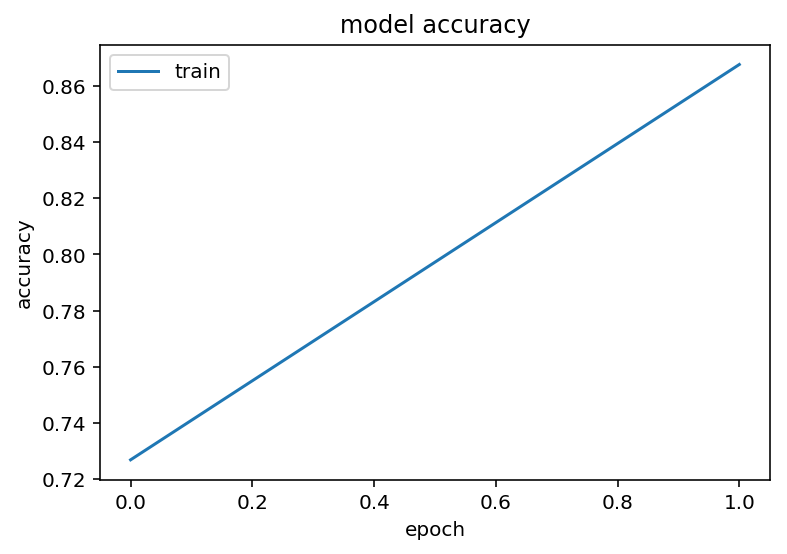

In [16]:
plt.plot(history.history['acc'])           #plot accuracy
plt.title('model accuracy')                #add a title for the plot
plt.ylabel('accuracy')                     #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()

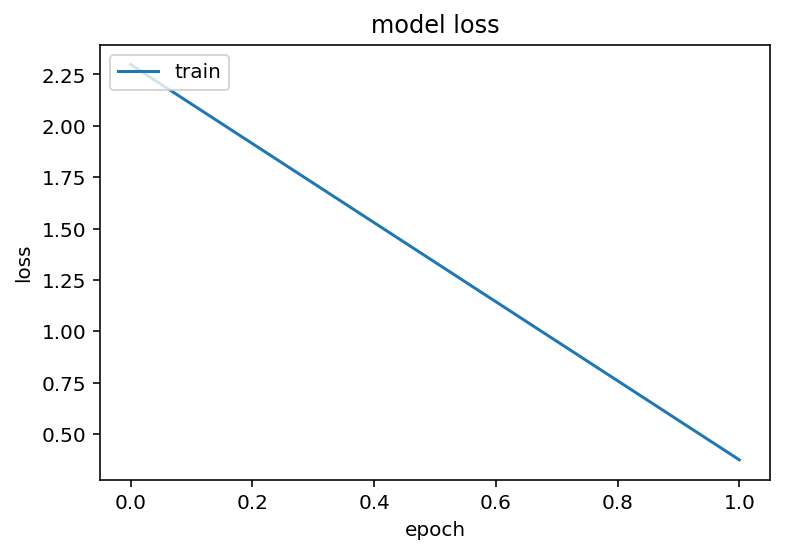

In [17]:
#lets plot loss now
plt.plot(history.history['loss'])          #plot loss
plt.title('model loss')                    #add a title for the plot
plt.ylabel('loss')                         #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()                                 #display plot

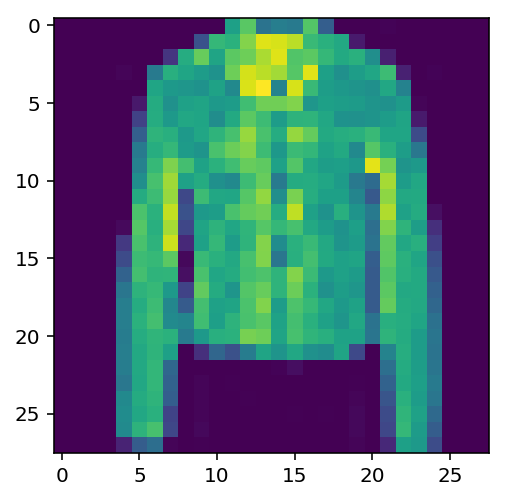

In [18]:
sample = testX[10:11]                      #pull a case from test set
sample1 = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample1)                       #display the image
